### 1. 모듈 import

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report

### 2. 데이터 준비

In [3]:
breast_cancer = load_breast_cancer()
breast_cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### 3. 데이터 이해하기

In [4]:
breast_cancer_data = breast_cancer.data # 569 X 30
breast_cancer_label = breast_cancer.target # 569 labels

In [5]:
print(breast_cancer_data.shape)

(569, 30)


In [6]:
breast_cancer_data[0] 

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [8]:
print(breast_cancer_label.shape)
breast_cancer_label[:20]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

#### Label 값이 0, 1 두개로만 구분됐다. 이때 0 : 악성 , 1 : 무해

In [9]:
import collections
collections.Counter(breast_cancer_label)

Counter({0: 212, 1: 357})

#### target names 

In [17]:
print(breast_cancer.target_names)

['malignant' 'benign']


#### feature : breast 특징

In [10]:
print(breast_cancer.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### 4. Train/Test split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(breast_cancer_data, breast_cancer_label, test_size = 0.2, random_state = 42)

print("Train set(N) : {} \nTest set(N) : {}".format(len(X_train),len(X_test)))

Train set(N) : 455 
Test set(N) : 114


### 5. 다양한 모델로 학습해보기.

- Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



- Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



- SVM

In [15]:
from sklearn import svm

svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



- SGD Classifier

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(X_train,y_train)
y_pred = sgd_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        43
           1       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



- Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

logistic_model.fit(X_train,y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 5. 정리

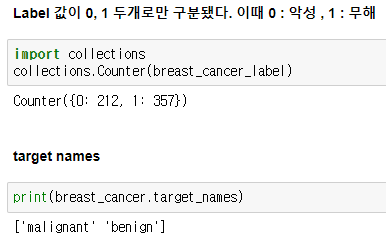

- 가슴의 특징을 가지고 유방암 여부를 판별하는 모델을 Deceision-Tree, Random-Forest, SVM, SGD-Classifier, Logistic Regression 기법을 이용해 구성했다.

- 0(악성)보다 1(무해) 클래스가 약 50% 많아 불균형한 데이터셋이다. 또한 악성 종양을 무해한 종양이라고 판단하는 것을 피해야 하기 때문에 성능 평가 지표로 Accuracy보단 **Recall(재현율)**을 사용한다.

|지표|Deceision-Tree|Random-Forest|SVM|SGD-Classifier|Logistic Regression|
|:------|:------|:------|:------|:------|:------|
|Recall|**0.93**|**0.93**|0.86|0.88|0.91|

 - Random-Forest, Decision-Tree 둘다 **0.93**의 Recall 값을 가진다. 이때 Random-Forest에서의 Precision과 Accuracy가 Decison-Tree에서 보다 높으므로 Random-Forest를 최적의 모델로 선택한다.